# Метод К-ближайших соседей (KNN - K Nearest Neighbors)
Метод К-ближайших соседей применяется для классификации данных. Мы будем работать с набором данных об уровнях генов. Уровени генов вычисляются как отношение между уровнем целевого гена (изучаемый ген) и уровня одного или нескольких референсных генов (как правило, уже имеющихся генов). Этот набор данных является синтетическим, и он специально был создан для того, чтобы показать сильные и слабые стороны метода KNN для классификации.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../DATA/gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### Визуализация
Так как признака всего два, удобнее всего нарисовать график scatterplot

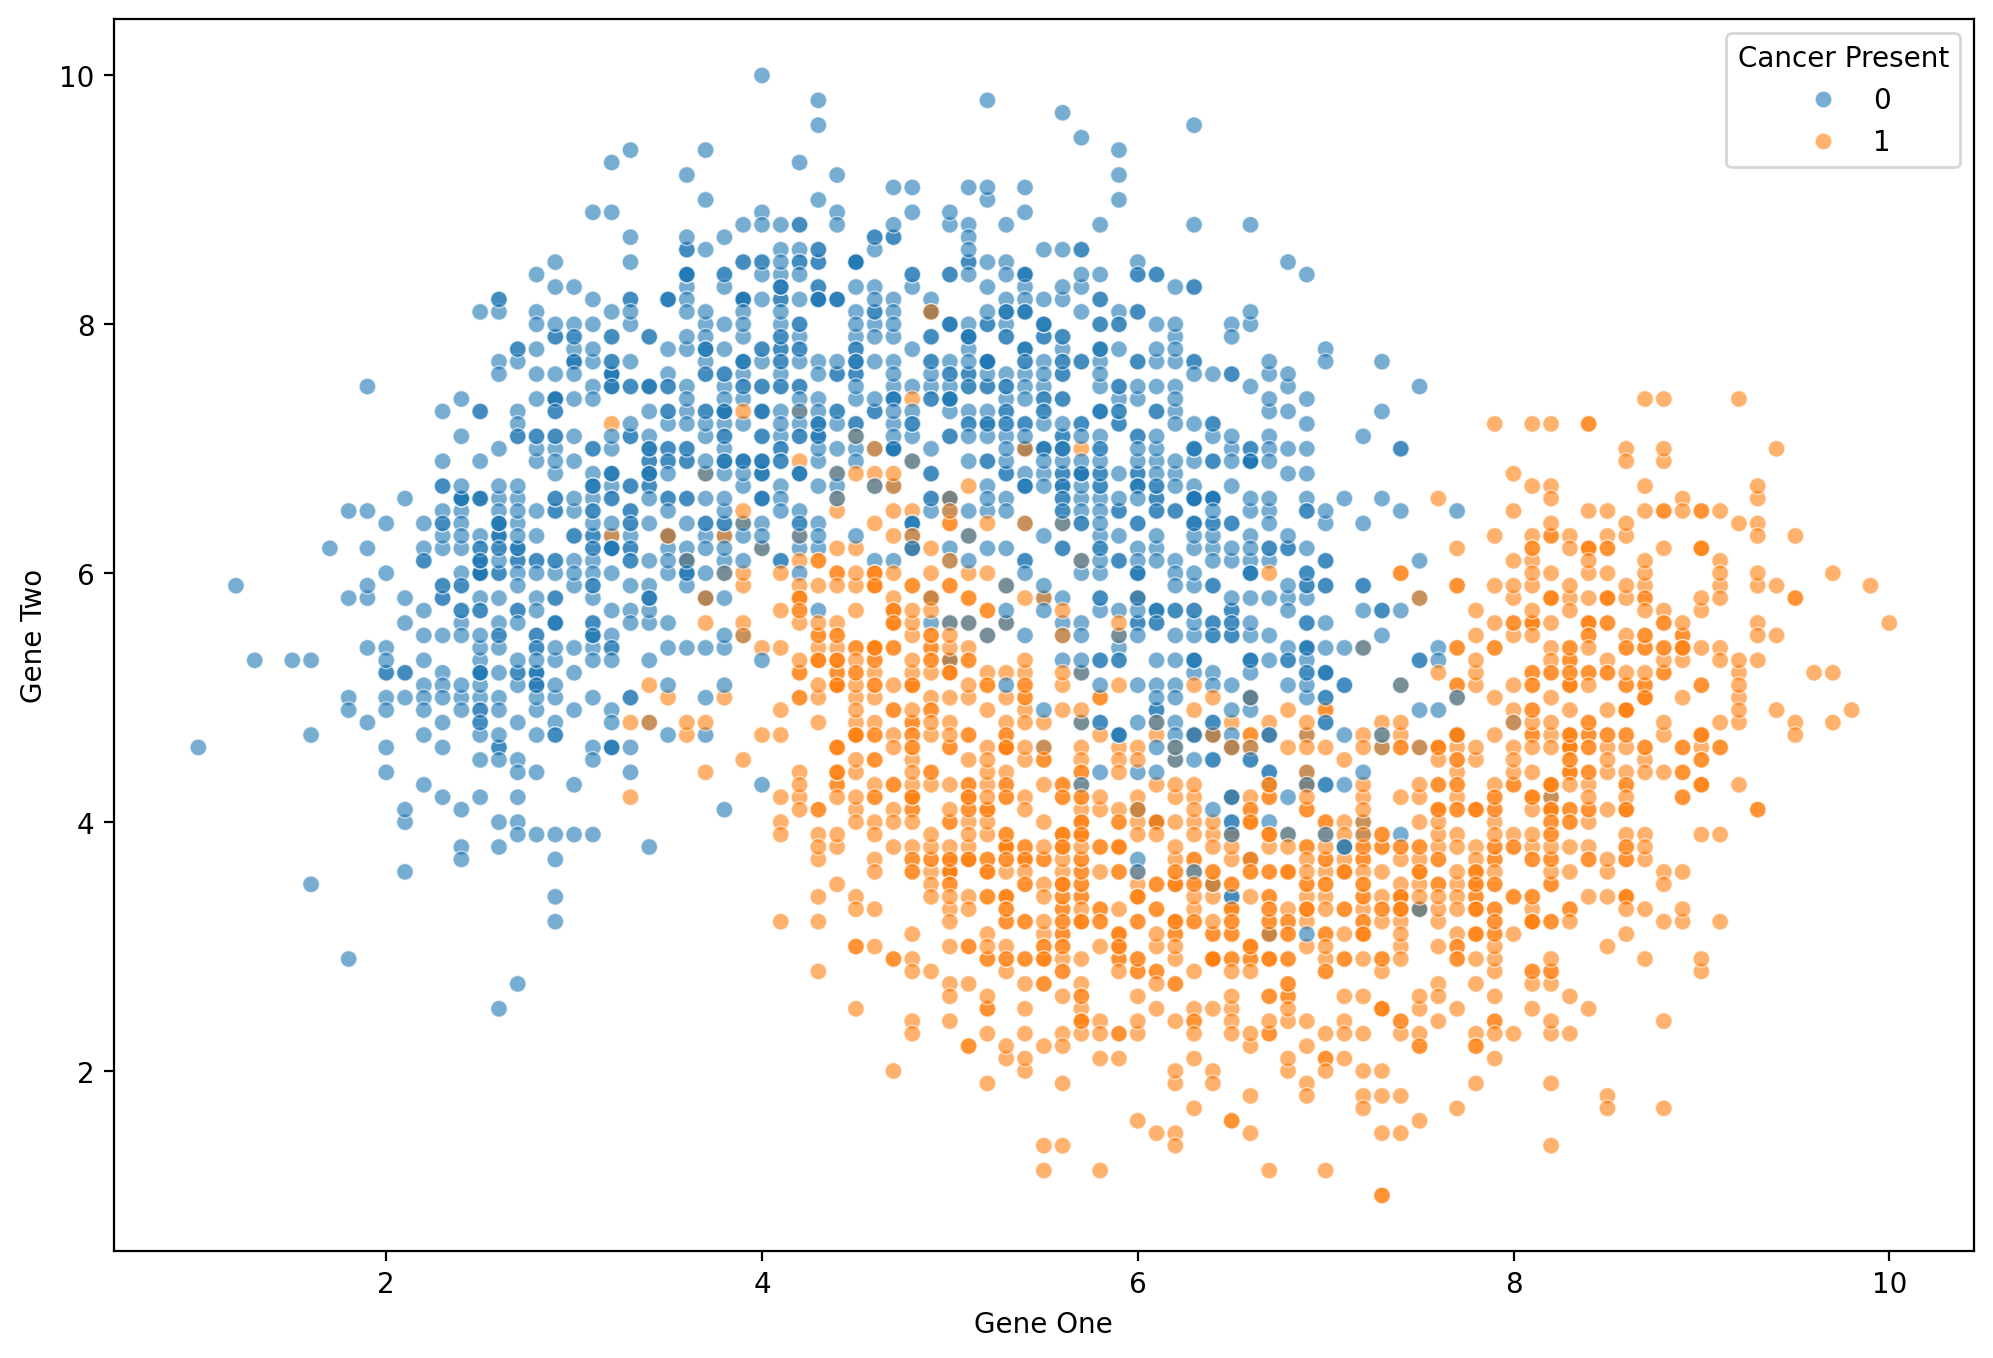

In [19]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)
plt.show()

По графику видим, что два кластера значений хорошо отделяются друг от друга. Однако - точки часто накладываются друг на друга. Мы получили общую картину, в частности мы видим, что значения признаков меняются от 0 до 10.

In [16]:
len(df)

3000

Если необходимо увеличить фрагмент графика, чтобы лучше увидеть участок графика где происходит соприкосновение двух классов - то это можно сделать следующим образом:

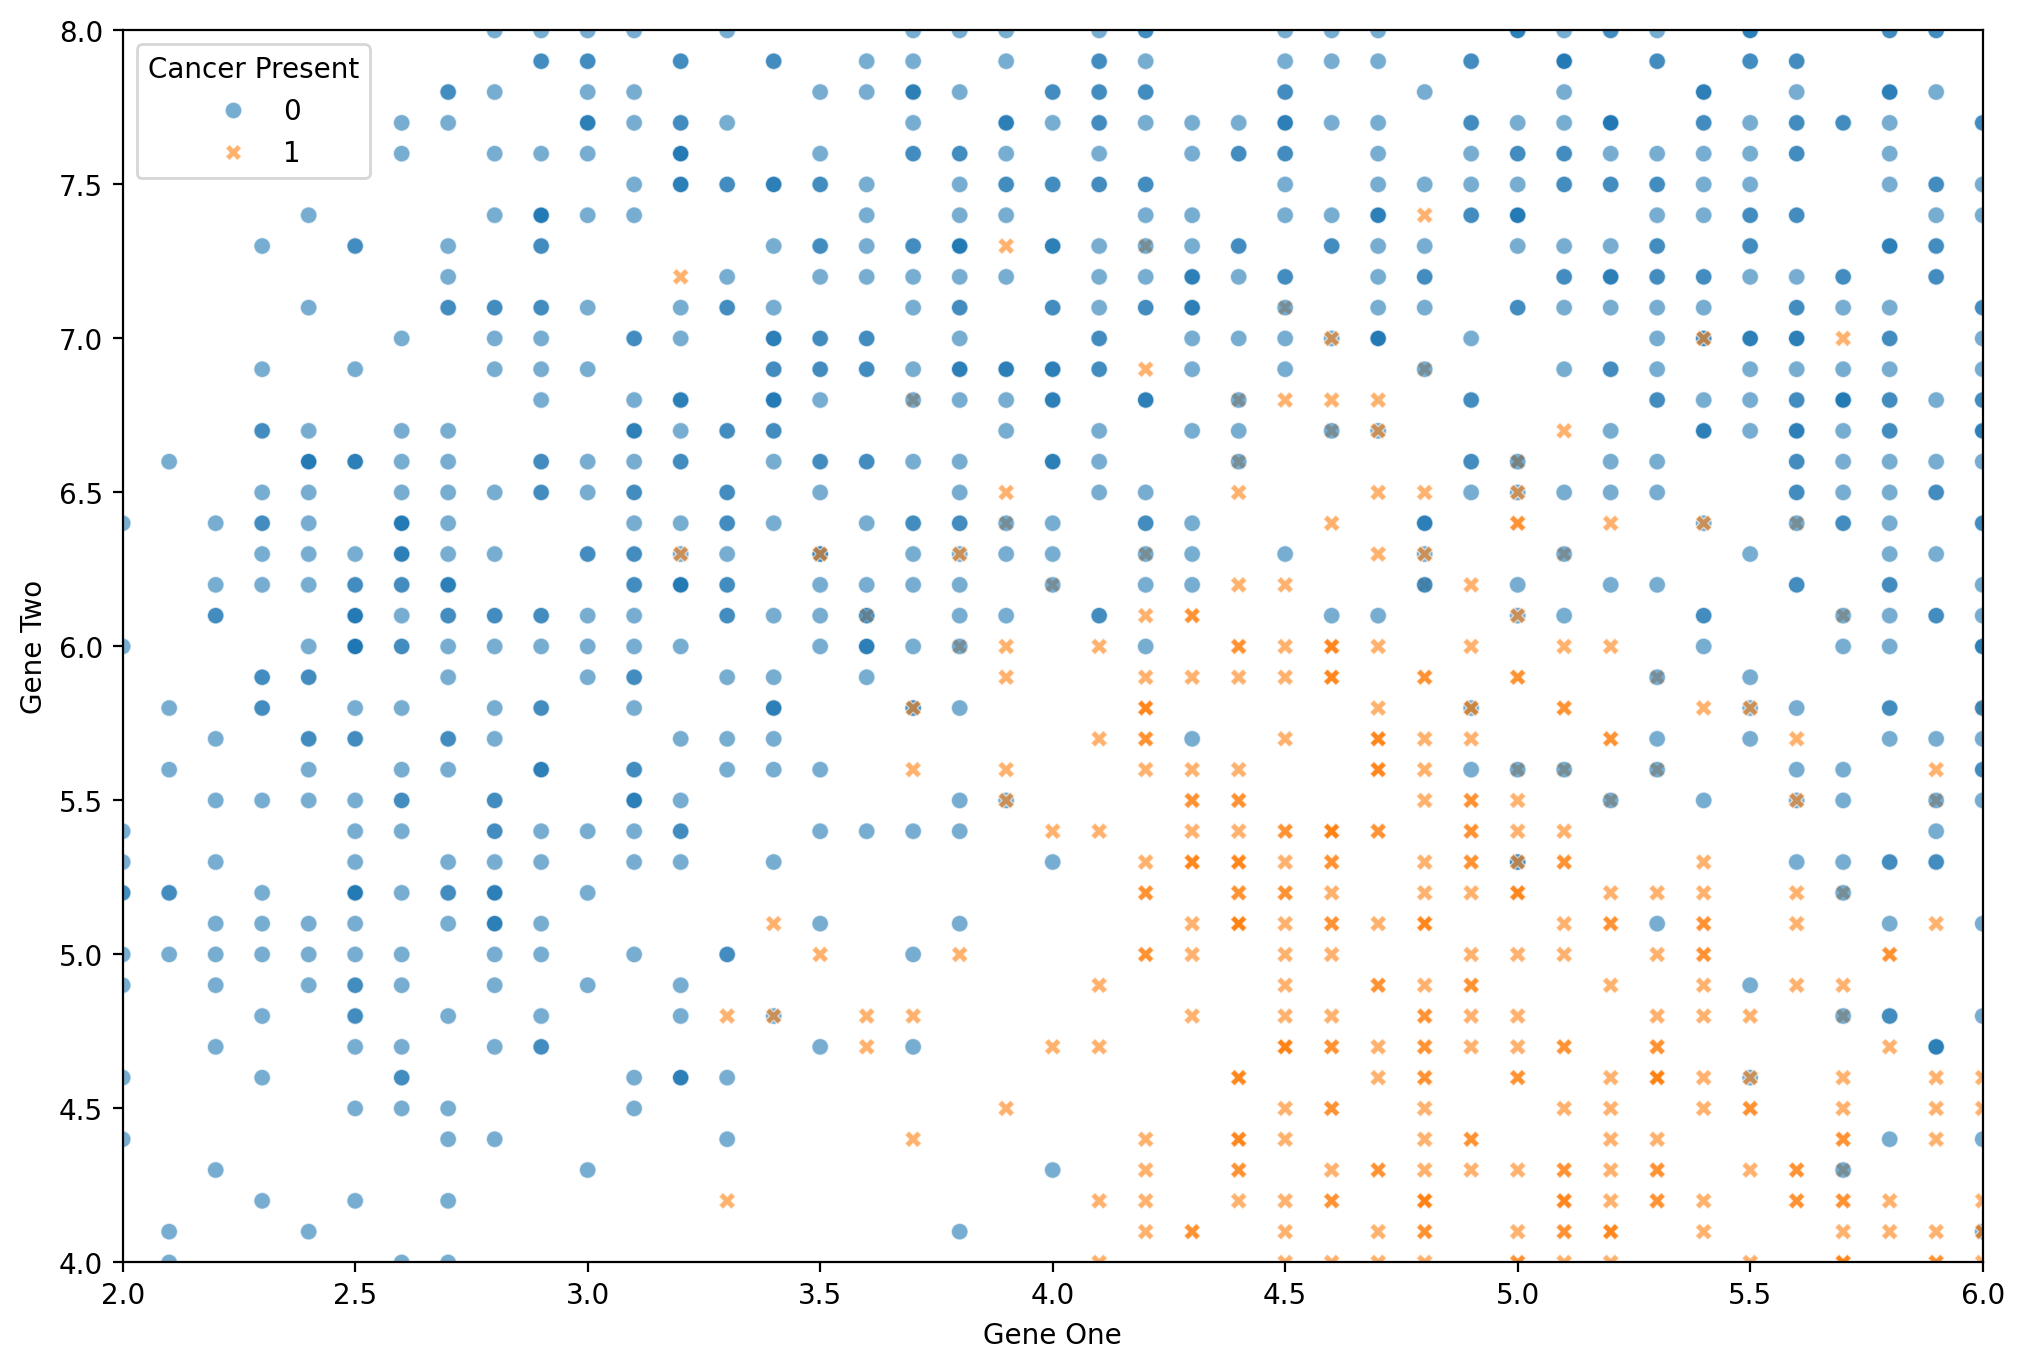

In [24]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style='Cancer Present')
plt.xlim(2, 6)
plt.ylim(4, 8)
plt.show()

На графике видны не только два разных кластера(синий и оранжевый), но и места, где произошло их наложение друг на друга.

Также можно построить график pairplot. Поскольку количество колонок небольшое, то можно построить график сразу для всех колонок.

<Figure size 2400x1600 with 0 Axes>

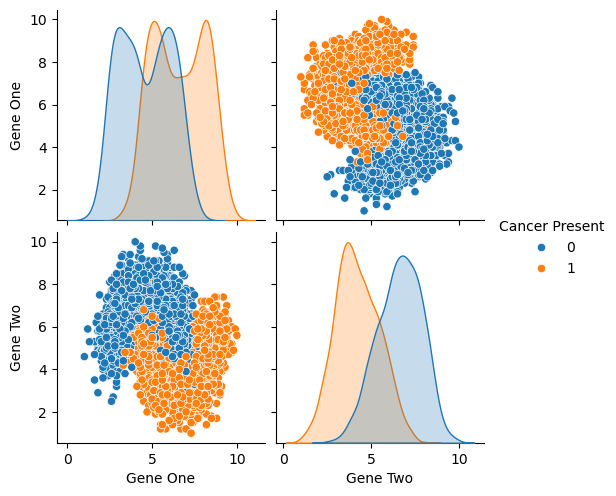

In [27]:
plt.figure(figsize=(12, 8), dpi=200)
sns.pairplot(data=df, hue='Cancer Present')
plt.show()

У первого гена есть два модальных значения - графики для обоих цветов имеют по две вершины. Для второго гена - видим распределение более похожее на нормальное распределение.

В принципе видно, что эти два класса отделимы друг от друга.

### Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

In [34]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Создание модели K-ближайших соседей

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

* Параметр `n_neighbors` - по умолчанию имеет значение 5. 
* Параметр `weights` отвечает за добавление некоторых весов для точек - это пригодится, когда какие-то точки являются более важными, чем остальные точки. По умолчанию имеет значение *uniform* - т.е. все точки равны между собой.

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Оценка работы модели на тестовых данных

In [55]:
y_pred = knn_model.predict(scaled_X_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 45, 385]], dtype=int64)

Мы видим, что здесь неправильно классифицированы 89 точек(45+44).

In [63]:
len(y_test)

900

Получается, что модель ошиблась в 89 случаях из 900. Насколько это хорошо или плохо - зависит от конкретной задачи. В частности от того, какие результаты были получены ранее.

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



Посмотрим на распределение значений в целевой переменной:

In [69]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

Видим равное распределение между двумя классами. Значит, у нас отсутствует несбалансированность классов.

В итоге, были получены некоторые относительно неплохие результаты для случая, когда *k=1*.

### Метод локтя для выбора хороших значений K
Замечание: здесь мы используем тестовый набор данных для выбора гиперпараметра K.

In [76]:
from sklearn.metrics import accuracy_score

In [78]:
# Для предыдущей модели
accuracy_score(y_test, y_pred)

0.9011111111111111

In [80]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 -accuracy_score(y_test, y_pred_test)

    test_error_rates.append(test_error)

In [82]:
test_error_rates

[0.09888888888888892,
 0.09777777777777774,
 0.07333333333333336,
 0.0755555555555556,
 0.07222222222222219,
 0.06444444444444442,
 0.06444444444444442,
 0.061111111111111116,
 0.05777777777777782,
 0.06222222222222218,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.05888888888888888,
 0.05777777777777782,
 0.05666666666666664,
 0.05555555555555558,
 0.05222222222222217,
 0.053333333333333344,
 0.054444444444444406,
 0.05111111111111111,
 0.054444444444444406,
 0.054444444444444406,
 0.05666666666666664,
 0.05555555555555558,
 0.05555555555555558,
 0.05777777777777782,
 0.05666666666666664]

<function matplotlib.pyplot.show(close=None, block=None)>

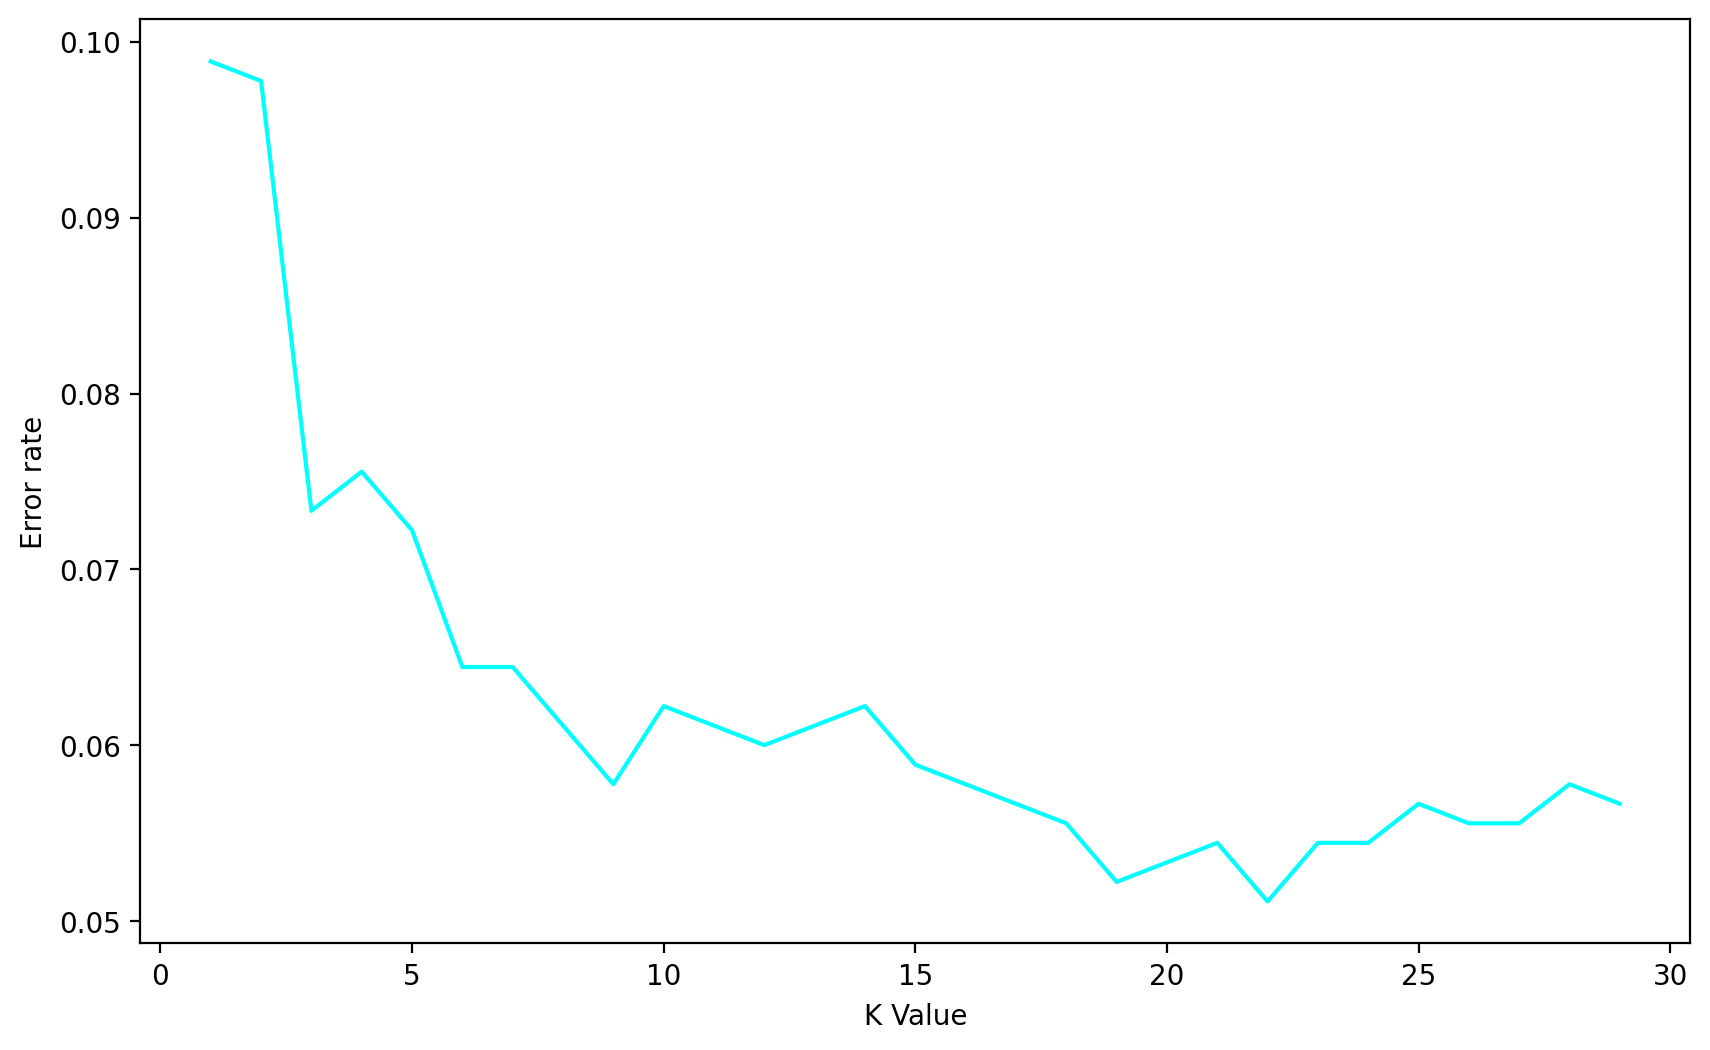

In [94]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(1, 30), test_error_rates, label='Test Error', color='aqua')
plt.ylabel('Error rate')
plt.xlabel('K Value')
plt.show

Какое значение *k* следует выбрать на основе этого графика? На первый взгляд, кажется что нужно выбрать значение *k=22* - то, где ошибка минимальна. Однако - это не вполне очевидно, потому что ошибка в этой точке на самом деле не так сильно отличается от ошибки в точке *k=6*. 

**Этот график может вводить в заблуждение тем, что здесь по оси Y значения начинаются не от нуля, потому что matplotlib автоматически подобрал значения шкалы в соответствии с теми данными, которые он увидел. Поэтому следует также указать `ylim` начиная с нуля и до 0,11 - это то максимальное значение, которое мы увидили на текущем графике.**

<function matplotlib.pyplot.show(close=None, block=None)>

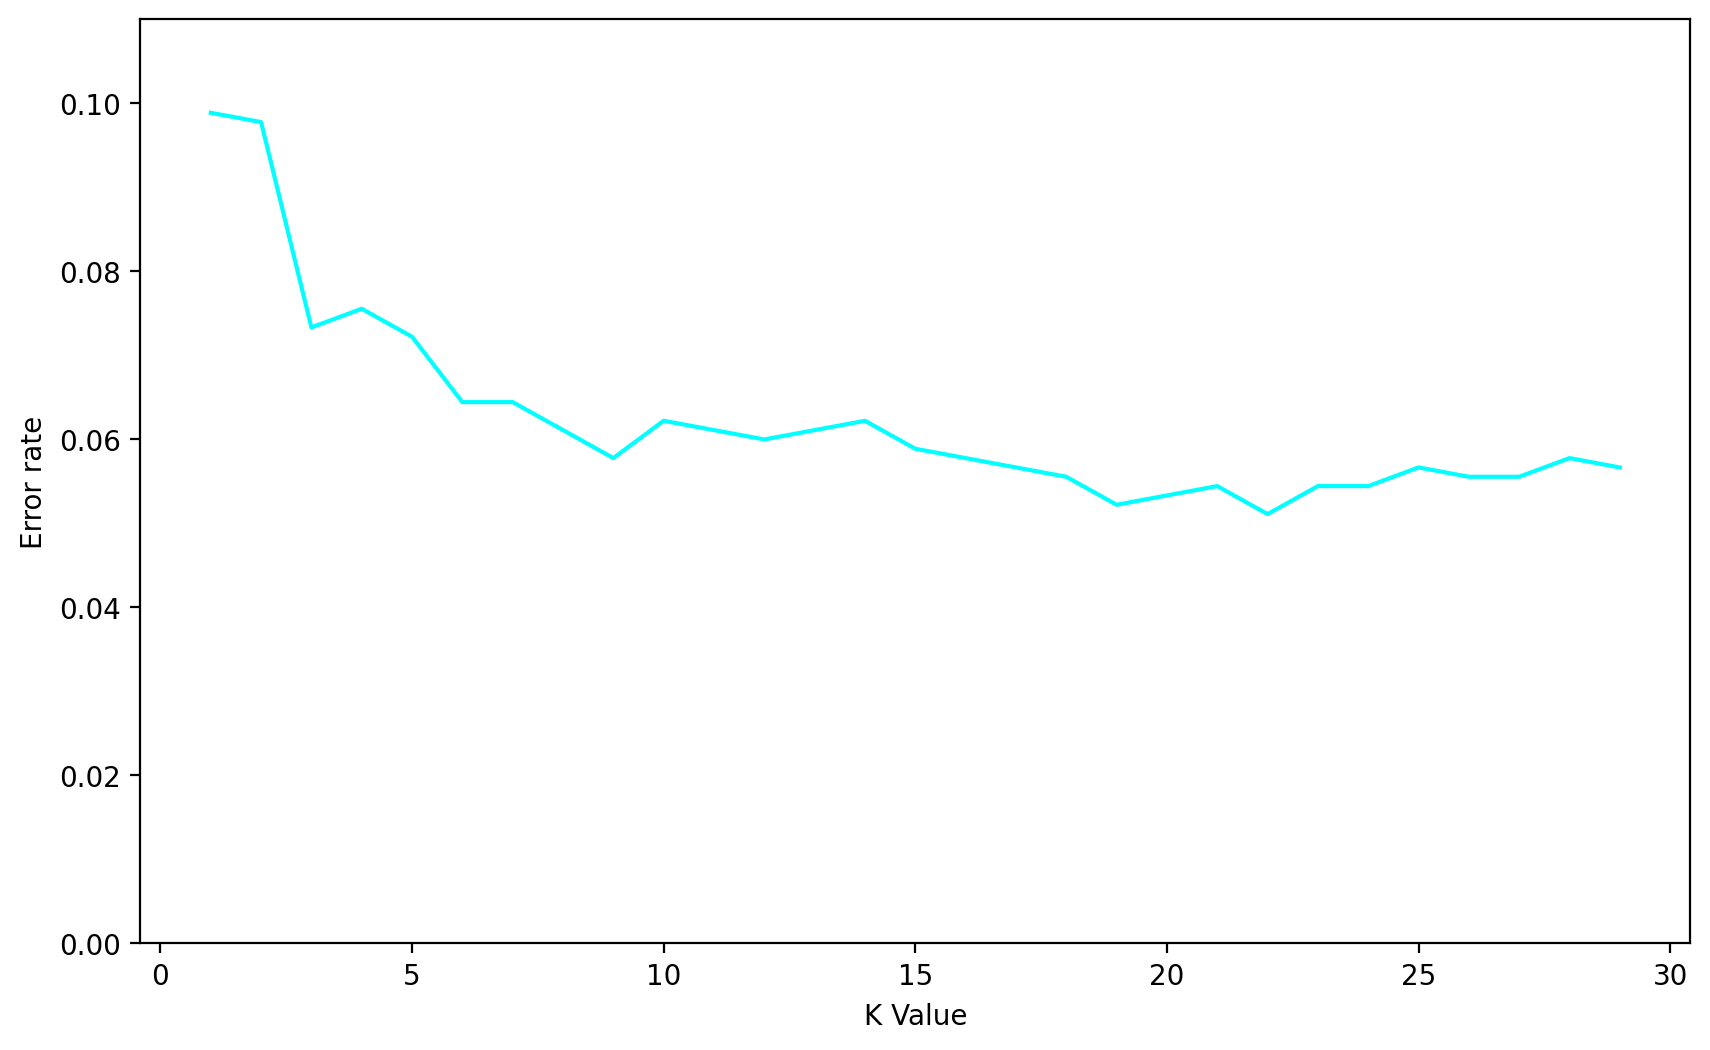

In [97]:
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(1, 30), test_error_rates, label='Test Error', color='aqua')
plt.ylabel('Error rate')
plt.xlabel('K Value')
plt.ylim(0, 0.11)
plt.show

На этом графике уже намного лучше видно то, что ошибка в точке *k=22*, на самом деле, не принципиально отличается от ошибки в точке *k=6*. Разница в ошибке всего 1%, а значение *k* отличается достаточно существенно.

**Поэтому имеет смысл выбрать меньшее значение *k*, чтобы  уменьшить сложность модели.** 

**Важно помнить, что вопрос баланса между сложностью и точностью модели зависит от конкретной задачи.**

Также необходимо отметить, что данный график был получен для конкретного разбиения на обучающий и тестовый наборы, на других разбиениях можно получить какие-то другие результаты. Поэтому, чтобы получить более надёжные результаты, с учётом различных разбиений данных, можно применить кросс-валидацию.

### Объект Pipeline в Scikit-Learn
Чтобы многократно выполнять операции такие как масштабирование признаков или работа с моделью в Scikit-Learn есть специальный объект Pipeline. Он позволит выполнять несколько операций единой командой.

#### Создание пайплайна для поиска значения K

**Здесь надо быть внимательным! Мы используем конкретные строковые коды И названия переменных, чтобы всё сделать правильно. Это не тот случай, когда можно легко менять названия переменных!**

Мы будем использовать объект Pipeline для настройки пайплайна из следующих операций:

1. Масштабирование данных
2. Создание модели на масштабируемых данных

----
*Как работает объект Scaler внутри Pipeline с кросс-валидацией (CV)? Является ли scikit-learn "достаточно умным", чтобы отдельно выполнить .fit() на обучающих данных, или выполнить .transform() на обучающих и тестовых данных?*

**Ответ - да! Пайплайны в Scikit-Learn отлично подходят для таких задач! [Дополнительные сведения можно почитать в документации](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).**

Когда применяется StandardScaler в качестве шага внутри Pipeline, то scikit-learn сделает всю нужную работу следующим образом:

* Шаг 0: Данные разбиваются на обучающий и тестовый наборы данных, в соответствии с параметром cv, который был указан в GridSearchCV.
* Шаг 1: объект scaler выбирает нужный масштаб на обучающем наборе данных
* Шаг 2: объект scaler трансформирует обучающий набор данных
* Шаг 3: выполняется обучение модели, используя трансформированный обучающий набор данных
* Шаг 4: объект scaler применяется для трансформации тестового набора данных
* Шаг 5: обученная модель выполняет предсказания, используя трансформированный тестовый набор данных

----

In [104]:
scaler = StandardScaler()

In [106]:
knn = KNeighborsClassifier()

Получим все параметры для метода KNeighborsClassifier

In [109]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [111]:
# Очень рекомендуется использовать строковый код, который соответствует названию переменной!
operations = [('scaler', scaler), ('knn', knn)]

Мы создали простой pipeline, который будет выполнять по порядку две операции - сначала масштабирование данных, затем работа с моделью.

### Создаём pipeline

In [114]:
from sklearn.pipeline import Pipeline

In [117]:
pipe = Pipeline(operations)

### Создаём поиск по сетке

In [121]:
from sklearn.model_selection import GridSearchCV

Создадим список со значениями *k*, которые будут перебираться. **Для каждого числа *k* будет выполняться не только обучение модели, но и кросс-валидация.**

In [126]:
k_values = list(range(1, 20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Так как мы используем pipeline - создание param_grid будет выполняться не так, как это делалось ранее. Причина в том, что когда мы передаем в GridSearchCV() переменную pipeline, то GridSearchCV() должен как-то понять, к какому из шагов pipeline применить тот или иной параметр.

---
*Замечание: Если сетка из параметров будет помещаться внутри PipeLine, то название параметра следует указывать в следующем виде:*

* выбранное название строки + **два** нижних подчёркивания + название ключевого параметра
* название модели + __ + название параметра
* knn_model + __ + n_neighbors
* knn_model__n_neighbors

[Статья на StackOverflow по этой теме](https://stackoverflow.com/questions/41899132/invalid-parameter-for-sklearn-estimator-pipeline).

Мы делаем это для того, чтобы scikit-learn знал, к какой операции пайплайна относятся эти параметры (иначе он может например подумать, что n_neighbors это параметр для scaler).

---

'knn' - название шага внутри operations, таким образом мы сообщаем методу GridSearchCV(), что мы хотим работать именно с этим шагом operations. Далее **два нижних подчёркивания** и название ключевого параметра n_neighbors.

In [129]:
param_grid = {'knn__n_neighbors': k_values}

Поскольку в Scikit-Learn чем больше значение - тем лучше, получается, если мы будем максимизировать метрику accuracy, то тем самым будем минимизировать ошибку.

In [133]:
full_cv_classifier = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')

Метод `.fit()` для модели следует вызывать для **исходных(!!!)** признаков, потому что шаг по масштабированию признаков находится внутри нашего pipeline. 

**ВАЖНО: это масштабирование признаков будет выполнено внутри процесса кросс-валидации, т.е., каждый раз, когда мы разбиваем данные на *k* частей, мы будем выполнять операцию `.fit()` для scaler только для нужной порции данных во время кросс-валидации. Для той порции данных, на которой мы проверяем модель мы будем выполнять только `.transform()`.**

In [136]:
# Используем полные данные X и y, если НЕ хотим отдельно отложить в сторону тестовый набор
# Используем X_train и y_train, если хотим отдельно отложить в сторону тестовый набор (X_test, y_test)
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

### Как узнать наилучшие параметры

In [139]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Здесь мы видим различные параметры как для объекта scaler, так и для объекта knn. Т.е. мы получили параметры не только для модели, а для всего pipeline.

Мы нашли оптимальное значение *k* и далее можно проверить работу модели на тестовых данных.

In [142]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

**Проверяем: сколько всего запусков мы сделали?**

In [145]:
len(k_values)

19

In [147]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.90380952, 0.90714286, 0.92142857, 0.91380952, 0.92380952,
       0.92047619, 0.92761905, 0.9252381 , 0.9247619 , 0.92285714,
       0.9252381 , 0.92428571, 0.92761905, 0.92809524, 0.92857143,
       0.93      , 0.92904762, 0.92857143, 0.92761905])

In [149]:
len(full_cv_classifier.cv_results_['mean_test_score'])

19

### Проверка работы модели на тестовых данных

In [154]:
# ПЕРЕДАЕМ ИСХОДНЫЕ ДАННЫЕ, ТАК КАК МАСШТАБИРОВАНИЕ 
# ВЫПОЛНЯЕТСЯ ВНУТРИ PIPELINE
full_pred = full_cv_classifier.predict(X_test)

In [156]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



На этот раз модель работает лучше, чем в предыдущем случае для *k=1*. Получается что для *k=1* - это была слишком простая модель. Здесь же, проверив различные варианты с помощью кросс-валидации, получилось, что значение *k=16*('knn__n_neighbors': 16) в среднем минимизирует ошибку.

### Проверка работы модели на новых данных

In [161]:
new_patient = [[3.8, 6.4]]

In [163]:
full_cv_classifier.predict(new_patient)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [165]:
full_cv_classifier.predict_proba(new_patient)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1., 0.]])

Получаем предсказание класса 0 со 100% вероятностью. Вероятность для метода KNN вычисляется как соотношение голосов среди k-ближайших соседей, т.е. для нового пациента - все ближайшие 16 соседей относились к классу 0, поэтому здесь получена вероятность 100% для класса 0.

### Финальная модель
Как мы увидели, метод GridSearch рекомендует значение *k=16*. Теперь снова применим pipeline, но на этот раз нам не нужно выполнять поиск по сетке, вместо этого мы сделаем оценки на тестовом наборе данных.

Дополнительная задумка в том, чтобы использовать объекты pipeline. В итоге есть 2 варианта кода для pipeline - с использованием GridSearchCV (full_cv_classifier) и без использования GridSearchCV (финальная модель).

Можно было бы обойтись и без финальной модели. Здесь она приведена в качестве примера кода для pipeline - для тех случаев, когда мы из каких-то соображений уже знаем значение параметра K.

In [173]:
scaler = StandardScaler()
knn16 = KNeighborsClassifier(n_neighbors=16)
operations = [('scaler', scaler),('knn16', knn16)]

In [175]:
pipe = Pipeline(operations)

In [177]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn16', KNeighborsClassifier(n_neighbors=16))])

In [179]:
pipe_pred = pipe.predict(X_test)

In [181]:
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [183]:
single_sample = X_test.iloc[40]
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [185]:
pipe.predict(single_sample.values.reshape(1, -1))

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [187]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.9375, 0.0625]])